# Predicting Bike Rentals

### The dataset contains hourly bike rentals for a period of two years from Washington DC.

### The objective is to predict the hourly rentals

### List of data columns:
- instant - A unique sequential ID number for each row
- dteday - The date of the rentals
- season - The season in which the rentals occurred
- yr - The year the rentals occurred
- mnth - The month the rentals occurred
- hr - The hour the rentals occurred
- holiday - Whether or not the day was a holiday
- weekday - The day of the week (as a number, 0 to 7)
- workingday - Whether or not the day was a working day
- weathersit - The weather (as a categorical variable)
- temp - The temperature, on a 0-1 scale
- atemp - The adjusted temperature
- hum - The humidity, on a 0-1 scale
- windspeed - The wind speed, on a 0-1 scale
- casual - The number of casual riders (people who hadn't previously signed up -with the bike sharing program)
- registered - The number of registered riders (people who had already signed up)
- cnt - The total number of bike rentals (casual + registered)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
bike_rentals = pd.read_csv("bike_rental_hour.csv")
#drop instant(bike specific ID no) as well as casual and registered, 
#which both add up to cnt, or the total no. of rentals
bike_rentals = bike_rentals.drop(["instant","casual","registered"], axis=1)

In [2]:
bike_rentals.corr()["cnt"].sort_values(ascending=True)

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
hr            0.394071
atemp         0.400929
temp          0.404772
cnt           1.000000
Name: cnt, dtype: float64

In [ ]:
# Temp and Atemp both correlate very well with cnt

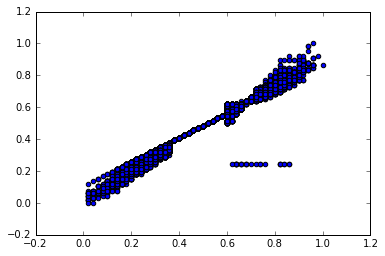

In [42]:
plt.scatter(bike_rentals["temp"],bike_rentals["atemp"] )
plt.show()

In [4]:
#remove atemp since it is highly correlated to temp. (done later in the code)

In [6]:
#Split the dataset into test and train:
import numpy, math
numpy.random.seed(1)
bike_rentals = bike_rentals.reindex(numpy.random.permutation(bike_rentals.index))
train_max_row = math.floor(bike_rentals.shape[0]*0.8)
train = bike_rentals.iloc[:train_max_row,:]
test = bike_rentals.iloc[train_max_row:,:]

In [7]:
#Select columns for training:
columns=bike_rentals.drop(["cnt","dteday","atemp"],axis=1).columns.tolist()
columns

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'hum',
 'windspeed']

In [43]:
#Since I am predicting outcome based on variables that are categorical 
#and non-normally distributed, I will use RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators = 150, random_state=1,  min_samples_leaf=10)

clf.fit(train[columns], train["cnt"])
predictions = clf.predict(test[columns])

score=mean_squared_error(test["cnt"], predictions)
rmse=math.sqrt(score)
print(rmse)

50.33698677711539


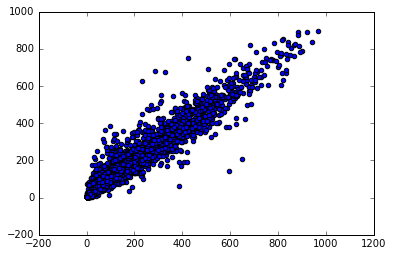

In [45]:
# First run offers root mean square error of 50. 
#The scatter plot looks as follows:
plt.scatter(test["cnt"], predictions)

In [46]:
#Now I proceed to hyperparameter optimization:

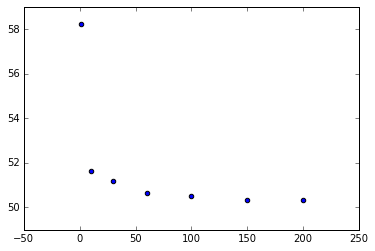

In [50]:
def hyper_par_adjustment():
    lista=[1,10,30,60,100,150,200]
    lista2= []
    for item in lista:
        clf = RandomForestRegressor(n_estimators = item, random_state=1,  min_samples_leaf=10)
        clf.fit(train[columns], train["cnt"])
        predictions = clf.predict(test[columns])
        score = mean_squared_error(test["cnt"], predictions)
        lista2.append(math.sqrt(score))
    plt.scatter(lista,lista2)
hyper_par_adjustment()    

In [51]:
#keep the n_estimators at 100

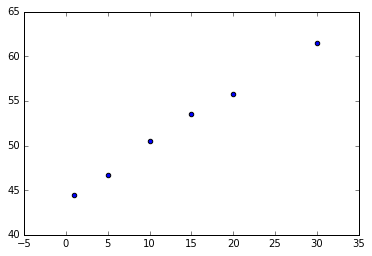

In [52]:
def hyper_par_adjustment():
    lista=[1,5,10,15,20,30]
    lista2= []
    for item in lista:
        clf = RandomForestRegressor(n_estimators = 100, random_state=1,  min_samples_leaf=item)
        clf.fit(train[columns], train["cnt"])
        predictions = clf.predict(test[columns])
        score = mean_squared_error(test["cnt"], predictions)
        lista2.append(math.sqrt(score))
    plt.scatter(lista,lista2)
hyper_par_adjustment()       

In [53]:
#set min_sample_leaf to 1

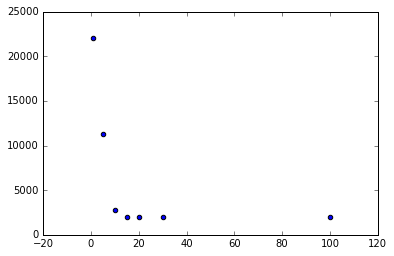

In [54]:
def hyper_par_adjustment():
    lista=[1,5,10,15,20,30,100]
    lista2= []
    for item in lista:
        clf = RandomForestRegressor(n_estimators = 100, random_state=1,  min_samples_leaf=1, max_depth=item)
        clf.fit(train[columns], train["cnt"])
        predictions = clf.predict(test[columns])
        score = mean_squared_error(test["cnt"], predictions)
        lista2.append(score)
    plt.scatter(lista,lista2)
hyper_par_adjustment()

In [ ]:
# Set max depth to 15

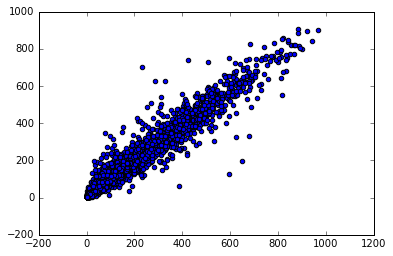

In [57]:
clf = RandomForestRegressor(n_estimators = 100, random_state=1,  min_samples_leaf=1, max_depth=15)

clf.fit(train[columns], train["cnt"])
predictions = clf.predict(test[columns])

plt.scatter(test["cnt"], predictions)
plt.show()

In [56]:
score = mean_squared_error(test["cnt"], predictions)
rmse=math.sqrt(score)
print(rmse)

45.25347678137102


In [25]:
# investigate how the situation changed from one year to another:

In [59]:
yr1=bike_rentals[bike_rentals["yr"]==0]
yr2=bike_rentals[bike_rentals["yr"]==1]
growth=yr2["cnt"].mean()/yr1["cnt"].mean()
print(growth)

1.6319570412428936


In [61]:
#Note that there has been a significant growth in bicycles rented YOY. 
#This as well as other factors not captured in the variables will cause 
#the model to require constant adjustments to remian accurate.